<a href="https://colab.research.google.com/github/ashwinibhatM19/Samsung/blob/main/Regression_Predicting_meal_price_using_OLS_rdcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import statsmodels.api as sm

In [37]:
df = pd.read_csv("restaurants.csv")

In [38]:
X = df['Food_Quality']

Y = df['Price']

In [39]:
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

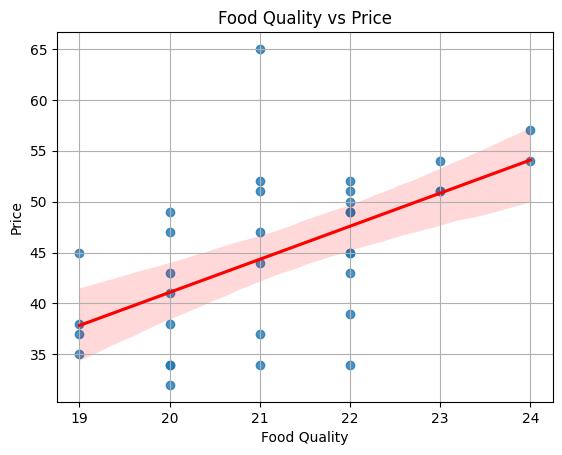

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='Food_Quality', y='Price', data=df, line_kws={"color": "red"})
plt.title("Food Quality vs Price")
plt.xlabel("Food Quality")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [40]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     15.15
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           0.000474
Time:                        04:38:51   Log-Likelihood:                -111.50
No. Observations:                  34   AIC:                             227.0
Df Residuals:                      32   BIC:                             230.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.9019     17.718     -1.349   

In [41]:
sm.stats.linear_rainbow(model)

(np.float64(3.95352909410105), np.float64(0.0051865838644822495))

In [42]:
model.params

,0
const,-23.901869
Food_Quality,3.249533


In [43]:
model.rsquared

np.float64(0.3212711726017563)

In [44]:
df.columns

Index(['Restaurant_ID', 'Food_Quality', 'Service_Quality', 'Price'], dtype='object')

Second Model

In [45]:
X2 = df['Service_Quality']

Y2 = df['Price']

In [46]:
X2 = sm.add_constant(X2)

model = sm.OLS(Y2, X2).fit()

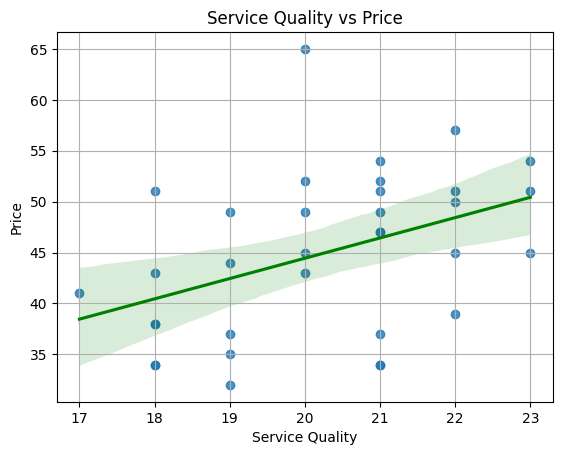

In [55]:
sns.regplot(x='Service_Quality', y='Price', data=df, line_kws={"color": "green"})
plt.title("Service Quality vs Price")
plt.xlabel("Service Quality")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [47]:
summary2 = model.summary()
print(summary2)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.886
Date:                Thu, 21 Aug 2025   Prob (F-statistic):             0.0132
Time:                        04:38:51   Log-Likelihood:                -114.77
No. Observations:                  34   AIC:                             233.5
Df Residuals:                      32   BIC:                             236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.5575     15.428     

Third Model

In [48]:
df.columns

Index(['Restaurant_ID', 'Food_Quality', 'Service_Quality', 'Price'], dtype='object')

In [49]:
X3 = df.drop(['Restaurant_ID','Price'],axis=1)

Y3 = df['Price']

In [50]:
import statsmodels.api as sm

X3 = sm.add_constant(X3)

model = sm.OLS(Y3, X3).fit()

In [51]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     7.392
Date:                Thu, 21 Aug 2025   Prob (F-statistic):            0.00237
Time:                        04:38:51   Log-Likelihood:                -111.46
No. Observations:                  34   AIC:                             228.9
Df Residuals:                      31   BIC:                             233.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -24.5782     18.147     

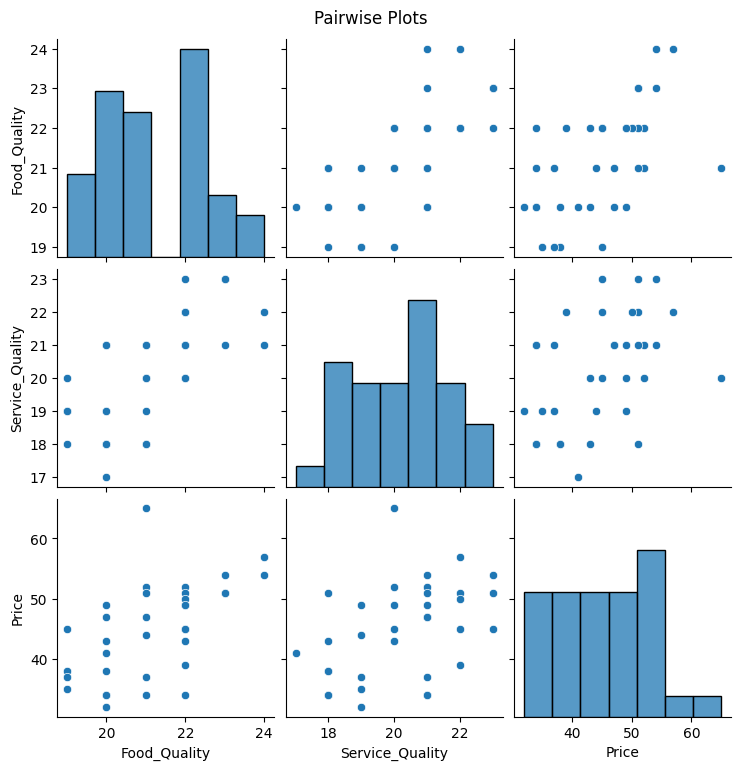

In [57]:
sns.pairplot(df[['Food_Quality', 'Service_Quality', 'Price']])
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

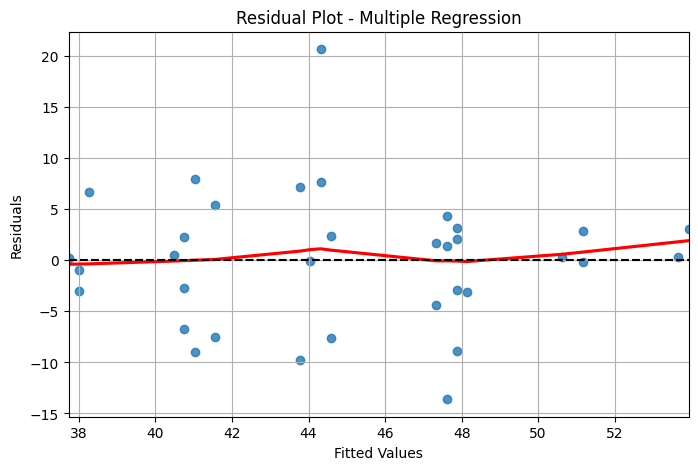

In [59]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8,5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot - Multiple Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import LabelEncoder

In [96]:
df = pd.read_csv("/content/Churn_Modelling (1).csv")

In [97]:
print("Columns:\n", df.columns)


Columns:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [98]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [99]:
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [100]:
X1 = df[['CreditScore']]
Y1 = df['EstimatedSalary']

X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()

print("\n--- OLS: CreditScore vs EstimatedSalary ---")
print(model1.summary())



--- OLS: CreditScore vs EstimatedSalary ---
                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.890
Time:                        05:24:00   Log-Likelihood:            -1.2379e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9998   BIC:                         2.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

In [101]:
rainbow_stat, rainbow_p = linear_rainbow(model1)
print(f"Rainbow Test - Stat: {rainbow_stat:.4f}, p-value: {rainbow_p:.4f}")

Rainbow Test - Stat: 1.0026, p-value: 0.4640


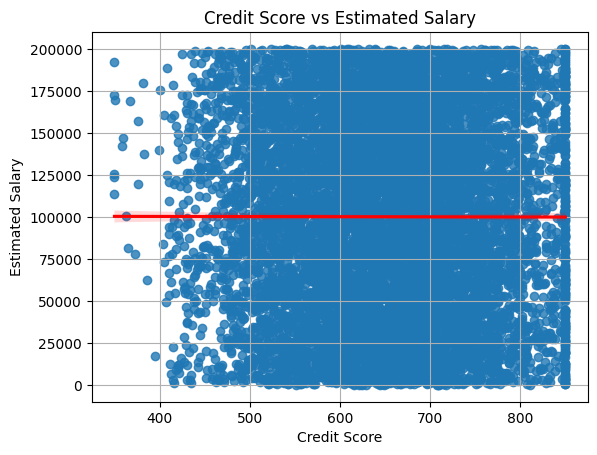

In [102]:
sns.regplot(x='CreditScore', y='EstimatedSalary', data=df, line_kws={'color': 'red'})
plt.title("Credit Score vs Estimated Salary")
plt.xlabel("Credit Score")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()

In [103]:
X2 = df[['Age']]
Y2 = df['EstimatedSalary']

X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()

print("\n--- OLS: Age vs EstimatedSalary ---")
print(model2.summary())



--- OLS: Age vs EstimatedSalary ---
                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5185
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.472
Time:                        05:24:36   Log-Likelihood:            -1.2379e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9998   BIC:                         2.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.0

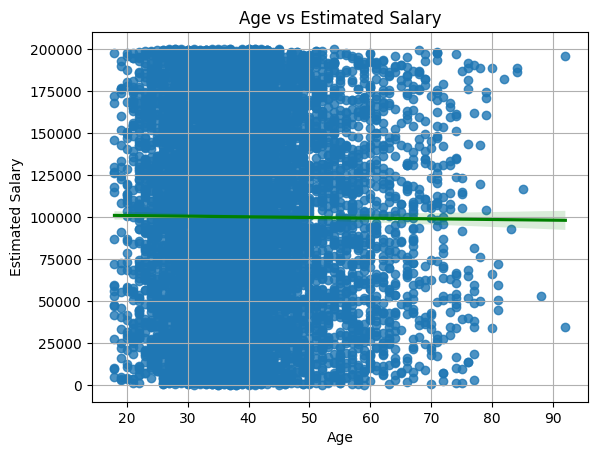

In [104]:
sns.regplot(x='Age', y='EstimatedSalary', data=df, line_kws={'color': 'green'})
plt.title("Age vs Estimated Salary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()

In [105]:
X3 = df.drop(['EstimatedSalary'], axis=1)
Y3 = df['EstimatedSalary']

X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()

print("\n--- OLS: Multiple Regression ---")
print(model3.summary())


--- OLS: Multiple Regression ---
                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.042
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.405
Time:                        05:25:01   Log-Likelihood:            -1.2378e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9989   BIC:                         2.477e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const     

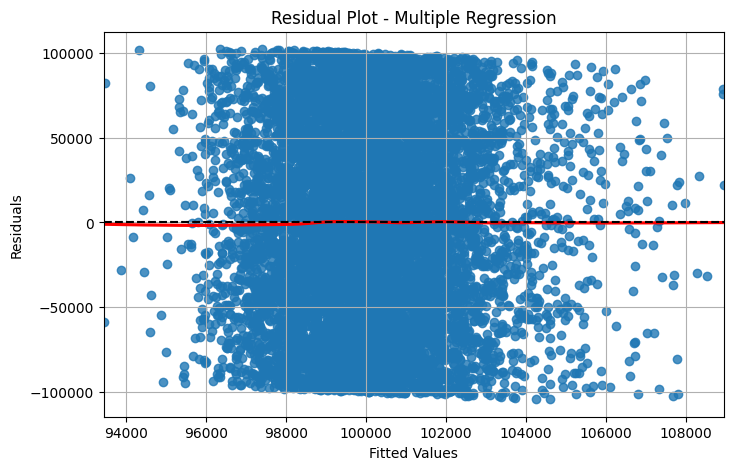

In [106]:
residuals = model3.resid
fitted = model3.fittedvalues

plt.figure(figsize=(8,5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='black')
plt.title("Residual Plot - Multiple Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

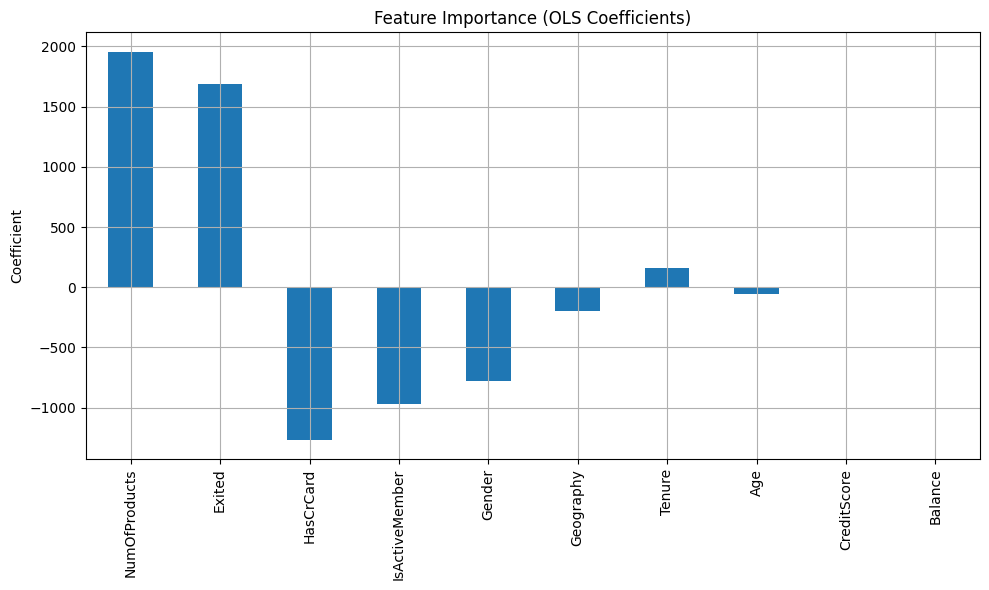

In [107]:
coefficients = pd.Series(model3.params.values[1:], index=X3.columns[1:])
coefficients = coefficients.sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coefficients.plot(kind='bar')
plt.title("Feature Importance (OLS Coefficients)")
plt.ylabel("Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [109]:
df = pd.read_csv("diabetes.csv")

In [111]:
print("Columns:", df.columns.tolist())
df.head()

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
X1 = df[['Glucose']]
Y1 = df['BMI']
X1 = sm.add_constant(X1)

model1 = sm.OLS(Y1, X1).fit()
print("\n--- OLS: Glucose vs BMI ---")
print(model1.summary())


--- OLS: Glucose vs BMI ---
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     39.36
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           5.89e-10
Time:                        05:28:56   Log-Likelihood:                -2655.8
No. Observations:                 768   AIC:                             5316.
Df Residuals:                     766   BIC:                             5325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4021  

In [113]:
rainbow_stat, rainbow_p = linear_rainbow(model1)
print(f"Rainbow Test - Stat: {rainbow_stat:.4f}, p-value: {rainbow_p:.4f}")


Rainbow Test - Stat: 1.1691, p-value: 0.0634


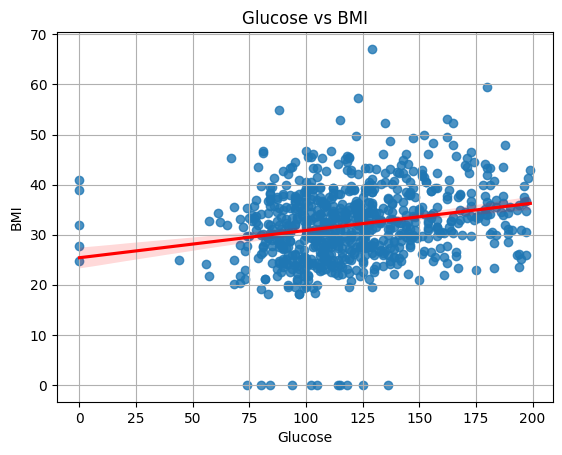

In [114]:
sns.regplot(x='Glucose', y='BMI', data=df, line_kws={'color': 'red'})
plt.title("Glucose vs BMI")
plt.grid(True)
plt.show()


In [115]:
X2 = df[['Age']]
Y2 = df['BMI']
X2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2).fit()
print("\n--- OLS: Age vs BMI ---")
print(model2.summary())



--- OLS: Age vs BMI ---
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.007
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.316
Time:                        05:29:28   Log-Likelihood:                -2674.5
No. Observations:                 768   AIC:                             5353.
Df Residuals:                     766   BIC:                             5362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1849      

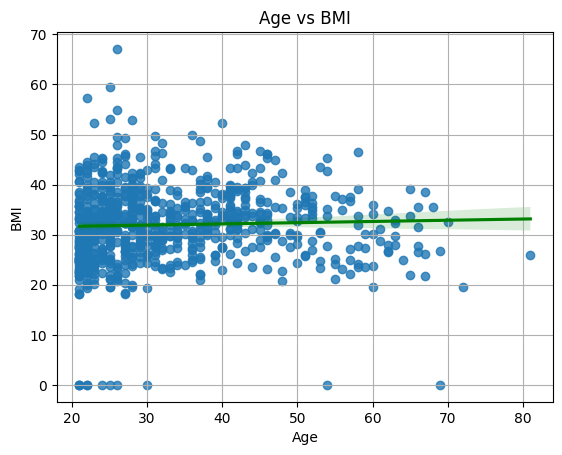

In [116]:
sns.regplot(x='Age', y='BMI', data=df, line_kws={'color': 'green'})
plt.title("Age vs BMI")
plt.grid(True)
plt.show()

In [117]:
# -------- Model 3: Multiple Linear Regression --------
X3 = df.drop(['BMI'], axis=1)  # Predict BMI
Y3 = df['BMI']
X3 = sm.add_constant(X3)

model3 = sm.OLS(Y3, X3).fit()
print("\n--- OLS: Multiple Linear Regression (All features → BMI) ---")
print(model3.summary())



--- OLS: Multiple Linear Regression (All features → BMI) ---
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     34.75
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           6.73e-47
Time:                        05:29:51   Log-Likelihood:                -2555.2
No. Observations:                 768   AIC:                             5128.
Df Residuals:                     759   BIC:                             5170.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

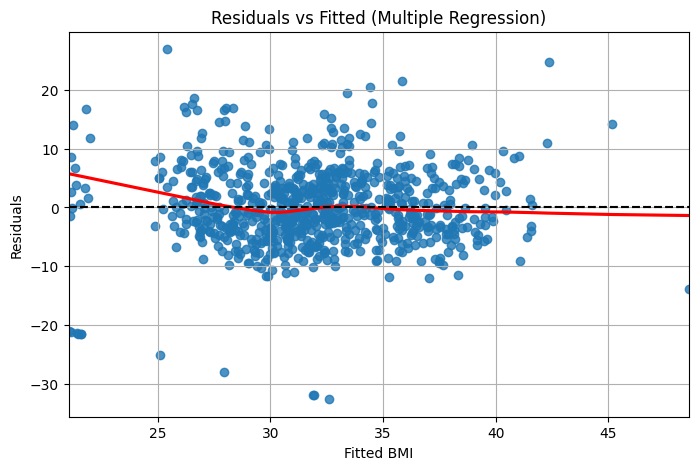

In [118]:
residuals = model3.resid
fitted = model3.fittedvalues

plt.figure(figsize=(8,5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Fitted (Multiple Regression)")
plt.xlabel("Fitted BMI")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


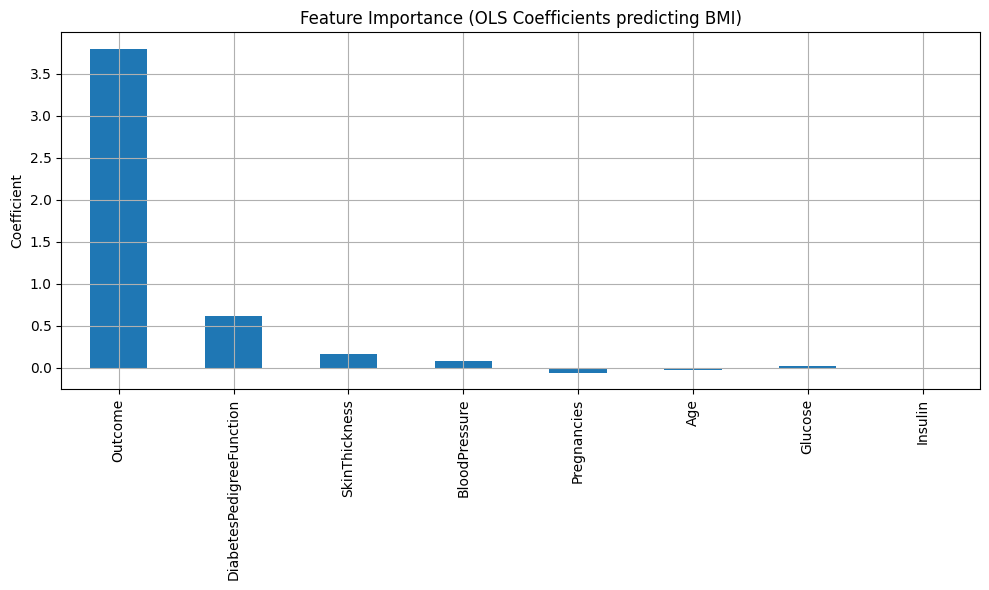

In [119]:
coefficients = pd.Series(model3.params.values[1:], index=X3.columns[1:])
coefficients = coefficients.sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coefficients.plot(kind='bar')
plt.title("Feature Importance (OLS Coefficients predicting BMI)")
plt.ylabel("Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import LabelEncoder

In [122]:
df = pd.read_csv("50_Startups.csv")

In [123]:
print("Columns:\n", df.columns)

Columns:
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [124]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [125]:
df['State'] = LabelEncoder().fit_transform(df['State'])

In [126]:
X1 = df[['R&D Spend']]
Y1 = df['Profit']
X1 = sm.add_constant(X1)

model1 = sm.OLS(Y1, X1).fit()
print("\n--- OLS: R&D Spend vs Profit ---")
print(model1.summary())



--- OLS: R&D Spend vs Profit ---
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           3.50e-32
Time:                        07:10:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e

In [127]:
rainbow_stat, rainbow_p = linear_rainbow(model1)
print(f"Rainbow Test - Stat: {rainbow_stat:.4f}, p-value: {rainbow_p:.4f}")

Rainbow Test - Stat: 4.1506, p-value: 0.0005


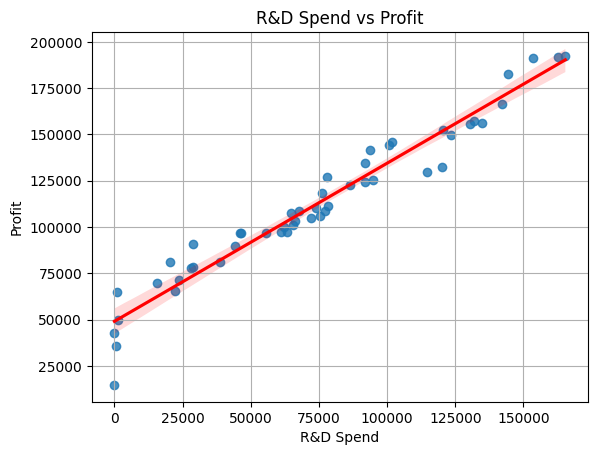

In [128]:
sns.regplot(x='R&D Spend', y='Profit', data=df, line_kws={'color': 'red'})
plt.title("R&D Spend vs Profit")
plt.grid(True)
plt.show()


In [129]:
X2 = df[['Marketing Spend']]
Y2 = df['Profit']
X2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2).fit()
print("\n--- OLS: Marketing Spend vs Profit ---")
print(model2.summary())


--- OLS: Marketing Spend vs Profit ---
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           4.38e-10
Time:                        07:11:38   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

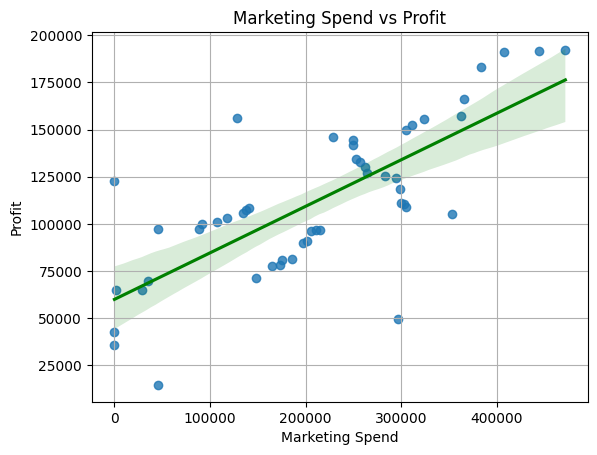

In [130]:
sns.regplot(x='Marketing Spend', y='Profit', data=df, line_kws={'color': 'green'})
plt.title("Marketing Spend vs Profit")
plt.grid(True)
plt.show()

In [131]:
X3 = df.drop('Profit', axis=1)
Y3 = df['Profit']
X3 = sm.add_constant(X3)

model3 = sm.OLS(Y3, X3).fit()
print("\n--- OLS: Multiple Regression (All features) ---")
print(model3.summary())


--- OLS: Multiple Regression (All features) ---
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           8.51e-29
Time:                        07:12:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

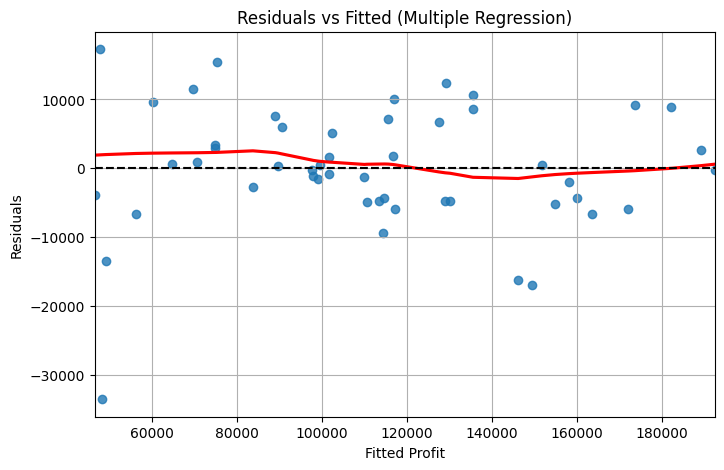

In [132]:
residuals = model3.resid
fitted = model3.fittedvalues

plt.figure(figsize=(8,5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Fitted (Multiple Regression)")
plt.xlabel("Fitted Profit")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


In [135]:
pip install pandas seaborn matplotlib statsmodels scikit-learn


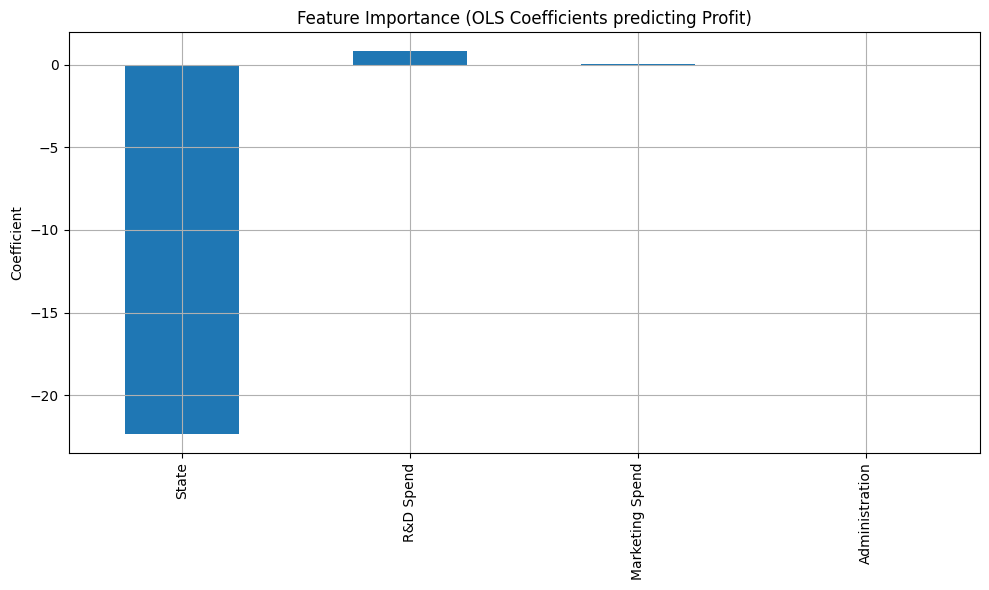

In [136]:
coefficients = pd.Series(model3.params.values[1:], index=X3.columns[1:])
coefficients = coefficients.sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
coefficients.plot(kind='bar')
plt.title("Feature Importance (OLS Coefficients predicting Profit)")
plt.ylabel("Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()